In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette("Set2")

%matplotlib inline

### Leer los datos

In [3]:
df = pd.read_csv("../data/respuestas.csv")

### Útiles

Las siguientes funciones se utilizan en los distintos análisis para clasificar las respuestas.|

In [4]:
def classify_answers(df, q, a1, a2):
    if df[q] == a1:
        return 'no'
    elif df[q] == a2:
        return 'no se'
    else : 
        return 'si'


def classify_answers_gratuidad_3grupos(df):
    if df['q_gratuidad'] == 'a_gratuidad_publicidades' : 
        return 'correcta'
    elif 'a_gratuidad_publicidades' in df['q_gratuidad'].replace(" ", "").split(',') :  # si la respuesta correcta esta dentro de las elegidas
        return 'mixta'
    elif df['q_gratuidad'] == 'a_gratuidad_nose':
        return 'no se'
    else : 
        return 'misconception'

    
def classify_answers_gratuidad(df):
    if 'a_gratuidad_publicidades' in df['q_gratuidad'].split(',') :  # si la respuesta correcta esta dentro de las elegidas
        return 'no' # misconception parcial NO Es misconception
    elif df['q_gratuidad'] == 'a_gratuidad_nose': # consideramos que no se NO es misconception
        return 'no'
    else : 
        return 'si'

### Creación de dataframes

A continuación se agrega al data frame una columna para cada pregunta, en donde se evalua si se respondió o no con misconception.

Vemos que para cada pregunta se agregan dos columnas, esto es porque en una de las columnas se evalua respuesta correcta o incorrecta (no se tiene en cuenta el "No sé"), mientras que en la otra columna si.

Por ejemplo en `misconception_yt` es misconception si la respuesta es cualquiera que no sea `a_yt_muchisimascompu` o `a_yt_nose` (los posibles valores para esta columna son "Si" y "No"), mientras que en `misconception_yt2` las posibles respuestas son "Si", "No" y "No sé" (indicando que el alumno respondió "No sé" en esa pregunta).

In [75]:
df['misconception_yt'] = np.where((df['q_yt']=='a_yt_muchisimascompu') | (df['q_yt']=='a_yt_nose'), 'no', 'si')
df['misconception_yt2'] = df.apply(lambda x: classify_answers(x, q='q_yt', a1='a_yt_muchisimascompu', a2='a_yt_nose'), axis=1)
df['misconception_acceso_fotos'] = np.where((df['q_acceso_fotos']=='a_acceso_fotos_yo') | (df['q_acceso_fotos']=='a_acceso_fotos_nose'), 'no', 'si')
df['misconception_acceso_fotos2'] = df.apply(lambda x: classify_answers(x, q='q_acceso_fotos', a1='a_acceso_fotos_yo', a2='a_acceso_fotos_nose'), axis=1)
df['misconception_mandar_fotos'] = np.where((df['q_mandar_fotos']=='a_mandar_fotos_copia') | (df['q_mandar_fotos']=='a_mandar_fotos_nose'), 'no', 'si')
df['misconception_mandar_fotos2'] = df.apply(lambda x: classify_answers(x, q='q_mandar_fotos', a1='a_mandar_fotos_copia', a2='a_mandar_fotos_nose'), axis=1)
df['misconception_borrar_fotos'] = np.where((df['q_borrar_fotos']=='a_borrar_fotos_nopuedo') | (df['q_borrar_fotos']=='a_borrar_fotos_nose'), 'no', 'si')
df['misconception_borrar_fotos2'] = df.apply(lambda x: classify_answers(x, q='q_borrar_fotos', a1='a_borrar_fotos_nopuedo', a2='a_borrar_fotos_nose'), axis=1)
df['misconception_mensaje_sin_wifi'] = np.where((df['q_mensaje_sin_wifi']=='a_mensaje_sin_wifi_red') | (df['q_mensaje_sin_wifi']=='a_mensaje_sin_wifi_nose'), 'no', 'si')
df['misconception_mensaje_sin_wifi2'] = df.apply(lambda x: classify_answers(x, q='q_mensaje_sin_wifi', a1='a_mensaje_sin_wifi_red', a2='a_mensaje_sin_wifi_nose'), axis=1)
df['misconception_gratuidad3'] = df.apply(lambda x: classify_answers_gratuidad(x), axis=1)
df['misconception_gratuidad'] = np.where((df['q_gratuidad']=='a_gratuidad_publicidades'), 'no', 'si')
df['misconception_gratuidad2'] = df.apply(lambda x: classify_answers(x, q='q_gratuidad', a1='a_gratuidad_publicidades', a2='a_gratuidad_nose'), axis=1)


## YouTube - Mensaje sin WiFi

Vamos a crear un dataframe que tenga una fila por alumno y en las columnas los valores 1 y 0 segun respondió con misconception o no cada una de las posibles respuestas para los pares de preguntas dados.

In [6]:
df_yt_vs_wifi =  df[['q_yt', 'q_mensaje_sin_wifi']].copy()
df_binary = pd.concat([pd.get_dummies(df_yt_vs_wifi['q_yt']), 
                    pd.get_dummies(df_yt_vs_wifi['q_mensaje_sin_wifi'])], 
                   axis=1)

df_binary = df_binary.rename(columns={"a_yt_1compu": "YouTube - Una compu",
                                  "a_yt_celular": "YouTube - Celular",
                                  "a_yt_muchascompu": "YouTube - Muchas compus",
                                  "a_yt_muchisimascompu": "YouTube - Muchísimas compus",
                                  "a_yt_nose": "YouTube - No sé",
                                  "a_yt_nube": "YouTube - Nube",
                                  "a_mensaje_sin_wifi_antena": "Sin WiFi - Antena",
                                  "a_mensaje_sin_wifi_directo": "Sin WiFi - Directamente",
                                  "a_mensaje_sin_wifi_nose": "Sin WiFi - No sé",
                                  "a_mensaje_sin_wifi_nube": "Sin WiFi - Nube",
                                  "a_mensaje_sin_wifi_red": "Sin WiFi - Red",
                                  "a_mensaje_sin_wifi_satelite": "Sin WiFi - Satélite"})

df_binary


,YouTube - Una compu,YouTube - Celular,YouTube - Muchas compus,YouTube - Muchísimas compus,YouTube - No sé,YouTube - Nube,Sin WiFi - Antena,Sin WiFi - Directamente,Sin WiFi - No sé,Sin WiFi - Nube,Sin WiFi - Red,Sin WiFi - Satélite
0,1,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
139,0,1,0,0,0,0,1,0,0,0,0,0
140,0,1,0,0,0,0,0,0,1,0,0,0
141,0,0,0,0,0,1,0,0,0,1,0,0
142,0,0,0,0,1,0,0,0,1,0,0,0


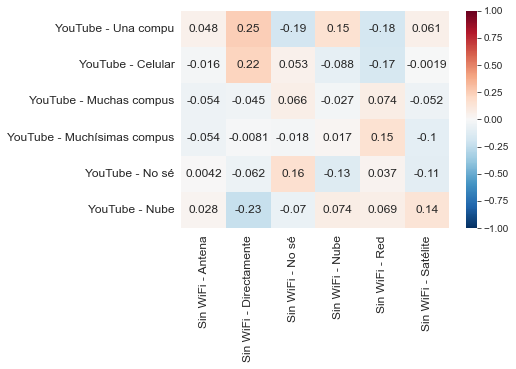

In [7]:
svm = sns.heatmap(df_binary.corr().iloc[:6,6:], cmap='RdBu_r', vmax=1, vmin=-1, annot=True, annot_kws={"size":12});
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

figure = svm.get_figure()    
figure.savefig('30.pdf', bbox_inches='tight')

### Midiendo la correlación entre los pares de respuesta.

Para cada par de respuestas que parezcan estar altamente correlacionados, generamos las tablas de contingencia y luego ejecutamos el algoritmo chi2_contingency.

### Generación de la tabla de contingencia - YouTube - Una compu vs SinWifi - Directamente


In [78]:
cross_tab_result = pd.crosstab(index=df_binary['YouTube - Una compu'], columns=df_binary['Sin WiFi - Directamente'])
cross_tab_result

Sin WiFi - Directamente,0,1
YouTube - Una compu,,
0,118,13
1,8,5


### Chi2_contingency

In [79]:
#https://medium.com/swlh/how-to-run-chi-square-test-in-python-4e9f5d10249d
    
from scipy.stats import chi2_contingency

# chi2 : float
#     The test statistic.
# p : float
#     The p-value of the test
# dof : int
#     Degrees of freedom
# expected : ndarray, same shape as `observed`
#     The expected frequencies, based on the marginal sums of the table.

chi2, p_value, dof, expected = chi2_contingency(cross_tab_result)

In [80]:
print(f"chi square result: {p_value:.7f} (chi2: {chi2:.2f})")
expected

chi square result: 0.0114761 (chi2: 6.39)


array([[114.625,  16.375],
       [ 11.375,   1.625]])

### Generación de la tabla de contingencia - YouTube - Celular vs SinWifi - Directamente



In [81]:
cross_tab_result = pd.crosstab(index=df_binary['YouTube - Celular'], columns=df_binary['Sin WiFi - Directamente'])
cross_tab_result

Sin WiFi - Directamente,0,1
YouTube - Celular,,
0,113,12
1,13,6


### Chi2_contingency

In [82]:
chi2, p_value, dof, expected = chi2_contingency(cross_tab_result)

print(f"chi square result: {p_value:.7f} (chi2: {chi2:.2f})")
expected


chi square result: 0.0199812 (chi2: 5.41)


array([[109.375,  15.625],
       [ 16.625,   2.375]])

### Generación de la tabla de contingencia - YouTube - Nube vs SinWifi - DIrectamente


In [83]:
cross_tab_result = pd.crosstab(index=df_binary['YouTube - Nube'], columns=df_binary['Sin WiFi - Directamente'])
cross_tab_result

Sin WiFi - Directamente,0,1
YouTube - Nube,,
0,69,16
1,57,2


### Chi2_contingency

In [84]:
chi2, p_value, dof, expected = chi2_contingency(cross_tab_result)
print(f"chi square result: {p_value:.2f} (chi2: {chi2:.2f})")
expected

chi square result: 0.01 (chi2: 6.24)


array([[74.375, 10.625],
       [51.625,  7.375]])

### Generación de la tabla de contingencia - YouTube - Muchísimas compus vs SinWifi - Directamente


In [85]:
cross_tab_result = pd.crosstab(index=df_binary['YouTube - Muchísimas compus'], 
                               columns=df_binary['Sin WiFi - Directamente'])
cross_tab_result

Sin WiFi - Directamente,0,1
YouTube - Muchísimas compus,,
0,111,16
1,15,2


### Chi2_contingency

In [86]:
chi2, p_value, dof, expected = chi2_contingency(cross_tab_result)
print(f"chi square result: {p_value:.2f} (chi2: {chi2:.2f})")
expected


chi square result: 1.00 (chi2: 0.00)


array([[111.125,  15.875],
       [ 14.875,   2.125]])

### Generación de la tabla de contingencia - YouTube - Nube vs SinWifi - Nube

In [87]:
cross_tab_result = pd.crosstab(index=df_binary['YouTube - Nube'], 
                               columns=df_binary['Sin WiFi - Nube'])
cross_tab_result

Sin WiFi - Nube,0,1
YouTube - Nube,,
0,82,3
1,55,4


### Chi2_contingency

In [88]:
chi2, p_value, dof, expected = chi2_contingency(cross_tab_result)
print(f"chi square result: {p_value:.2f} (chi2: {chi2:.2f})")
expected

chi square result: 0.62 (chi2: 0.25)


array([[80.86805556,  4.13194444],
       [56.13194444,  2.86805556]])

## Borrar y Mandar Fotos

Vamos a crear un dataframe que tenga una fila por alumno y en las columnas los valores 1 y 0 segun respondió con misconception o no cada una de las posibles respuestas para los pares de preguntas dados.

In [9]:
df_borrar_mandar =  df[['q_borrar_fotos', 'q_mandar_fotos']].copy()

df_binary_borrar_mandar = pd.concat([pd.get_dummies(df_borrar_mandar['q_borrar_fotos']), 
                    pd.get_dummies(df_borrar_mandar['q_mandar_fotos'])], 
                   axis=1)

df_binary_borrar_mandar = df_binary_borrar_mandar.rename(columns={"a_borrar_fotos_enelchat": "Borrar - En el chat",
                                  "a_borrar_fotos_enmicelu": "Borrar - En mi celu",
                                  "a_borrar_fotos_nopuedo": "Borrar - No puedo",
                                  "a_borrar_fotos_nose": "Borrar - No sé",
                                  "a_mandar_fotos_copia": "Mandar - copia",
                                  "a_mandar_fotos_enwa": "Mandar - En WhatsApp",
                                  "a_mandar_fotos_laveenmicelu": "Mandar - En mi celu",
                                  "a_mandar_fotos_nose": "Mandar - No sé"})


df_binary_borrar_mandar.head()

,Borrar - En el chat,Borrar - En mi celu,Borrar - No puedo,Borrar - No sé,Mandar - copia,Mandar - En WhatsApp,Mandar - En mi celu,Mandar - No sé
0,1,0,0,0,0,1,0,0
1,0,0,1,0,0,1,0,0
2,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0


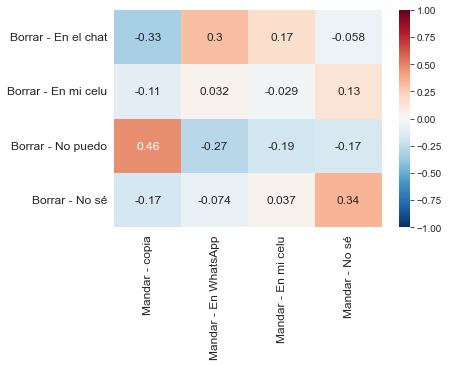

In [10]:
svm = sns.heatmap(df_binary_borrar_mandar.corr().iloc[:4,4:], cmap='RdBu_r', vmax=1, vmin=-1, annot=True, annot_kws={"size":12});
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
figure = svm.get_figure()    
figure.savefig('29.pdf', bbox_inches='tight')

### Generación de la tabla de contingencia Borrar - No Puedo vs Mandar - copia

In [91]:
cross_tab_result = pd.crosstab(index=df_binary_borrar_mandar['Borrar - No puedo'], 
                               columns=df_binary_borrar_mandar['Mandar - copia'])
cross_tab_result

Mandar - copia,0,1
Borrar - No puedo,,
0,65,24
1,14,41


### Chi2_contingency

In [92]:
chi2, p_value, dof, expected = chi2_contingency(cross_tab_result)
print(f"chi square result: {p_value:.7f} (chi2: {chi2:.2f})")
expected

chi square result: 0.0000001 (chi2: 29.18)


array([[48.82638889, 40.17361111],
       [30.17361111, 24.82638889]])

### Generación de la tabla de contingencia Borrar - No sé vs Mandar - No sé

In [93]:
cross_tab_result = pd.crosstab(index=df_binary_borrar_mandar['Borrar - No sé'], 
                               columns=df_binary_borrar_mandar['Mandar - No sé'])
cross_tab_result

Mandar - No sé,0,1
Borrar - No sé,,
0,120,12
1,6,6


### Chi2_contingency

In [94]:
chi2, p_value, dof, expected = chi2_contingency(cross_tab_result)
print(f"chi square result: {p_value:.2f} (chi2: {chi2:.2f})")
expected

chi square result: 0.00 (chi2: 13.30)


array([[115.5,  16.5],
       [ 10.5,   1.5]])

### Generación de la tabla de contingencia Borrar - En el chat vs Mandar - En WhatsApp

In [95]:

cross_tab_result = pd.crosstab(index=df_binary_borrar_mandar['Borrar - En el chat'], 
                               columns=df_binary_borrar_mandar['Mandar - En WhatsApp'])
cross_tab_result


Mandar - En WhatsApp,0,1
Borrar - En el chat,,
0,54,15
1,37,38


### Chi2_contingency

In [96]:
chi2, p_value, dof, expected = chi2_contingency(cross_tab_result)
print(f"chi square result: {p_value:.7f} (chi2: {chi2:.2f})")
expected

chi square result: 0.0006198 (chi2: 11.72)


array([[43.60416667, 25.39583333],
       [47.39583333, 27.60416667]])

### Generación de la tabla de contingencia Borrar - En el chat vs Mandar - copia

In [97]:
cross_tab_result = pd.crosstab(index=df_binary_borrar_mandar['Borrar - En el chat'], 
                               columns=df_binary_borrar_mandar['Mandar - copia'])
cross_tab_result

Mandar - copia,0,1
Borrar - En el chat,,
0,26,43
1,53,22


### Chi2_contingency

In [98]:
chi2, p_value, dof, expected = chi2_contingency(cross_tab_result)
print(f"chi square result: {p_value:.2f} (chi2: {chi2:.2f})")
expected


chi square result: 0.00 (chi2: 14.49)


array([[37.85416667, 31.14583333],
       [41.14583333, 33.85416667]])

### Generación de la tabla de contingencia Borrar - No puedo vs Mandar - En WhatsApp

In [99]:
cross_tab_result = pd.crosstab(index=df_binary_borrar_mandar['Borrar - No puedo'], 
                               columns=df_binary_borrar_mandar['Mandar - En WhatsApp'])
cross_tab_result

Mandar - En WhatsApp,0,1
Borrar - No puedo,,
0,47,42
1,44,11


### Chi2_contingency

In [100]:
chi2, p_value, dof, expected = chi2_contingency(cross_tab_result)
print(f"chi square result: {p_value:.2f} (chi2: {chi2:.2f})")
expected

chi square result: 0.00 (chi2: 9.67)


array([[56.24305556, 32.75694444],
       [34.75694444, 20.24305556]])